In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uber.csv')

>Preprocessing Dataset

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.drop(["Unnamed: 0", "key"], axis = 1, inplace = True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean(), inplace = True)
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].median(), inplace = True)

In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [18]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors = 'coerce')
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [21]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year)
df.drop('pickup_datetime', axis = 1, inplace = True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014


#### Removing outliers

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dtype: object

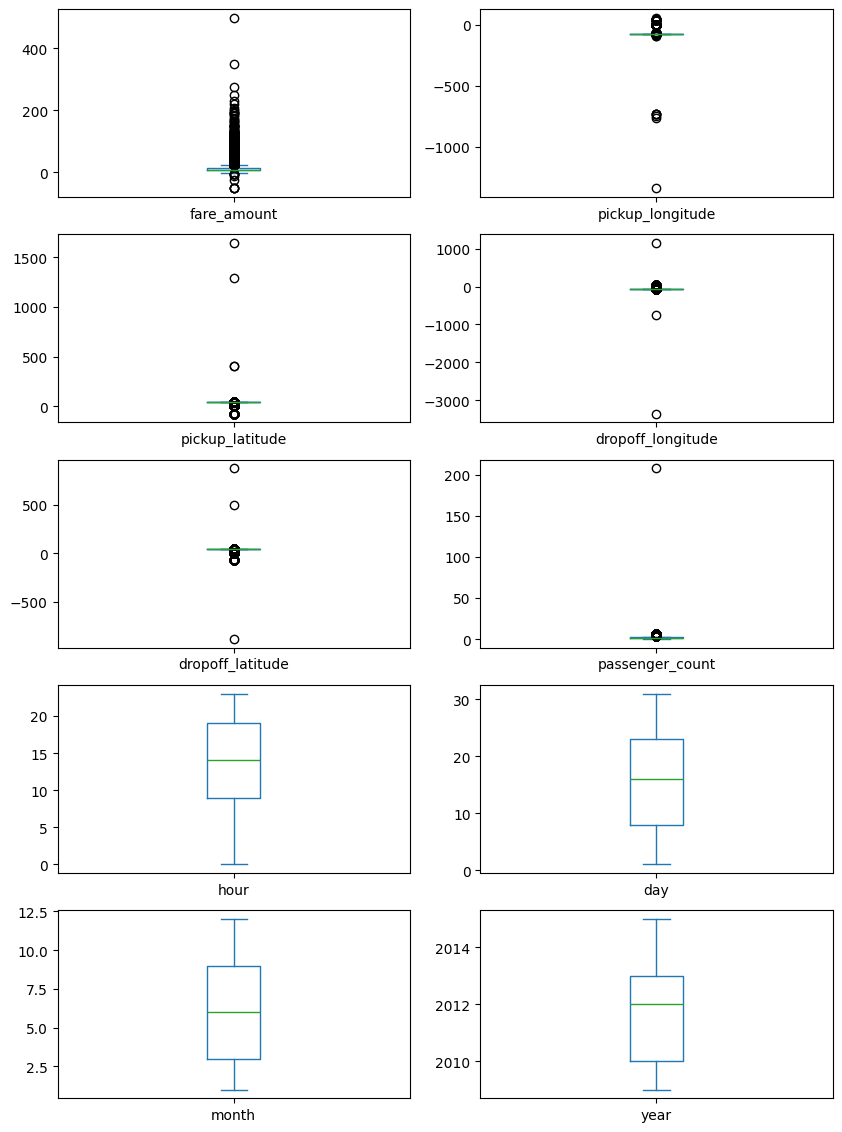

In [37]:
df.plot(kind = 'box', subplots = True, layout = (7,2), figsize=(10,20))

In [38]:
def rm_out(df1, col): 
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    R = Q3 + 1.5*IQR
    df[col] = np.clip(df1[col], L, R)
    return df1

def treat_all(df1, col_list):
    for c in col_list:
        df1 = rm_out(df, c)
    return df1

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dtype: object

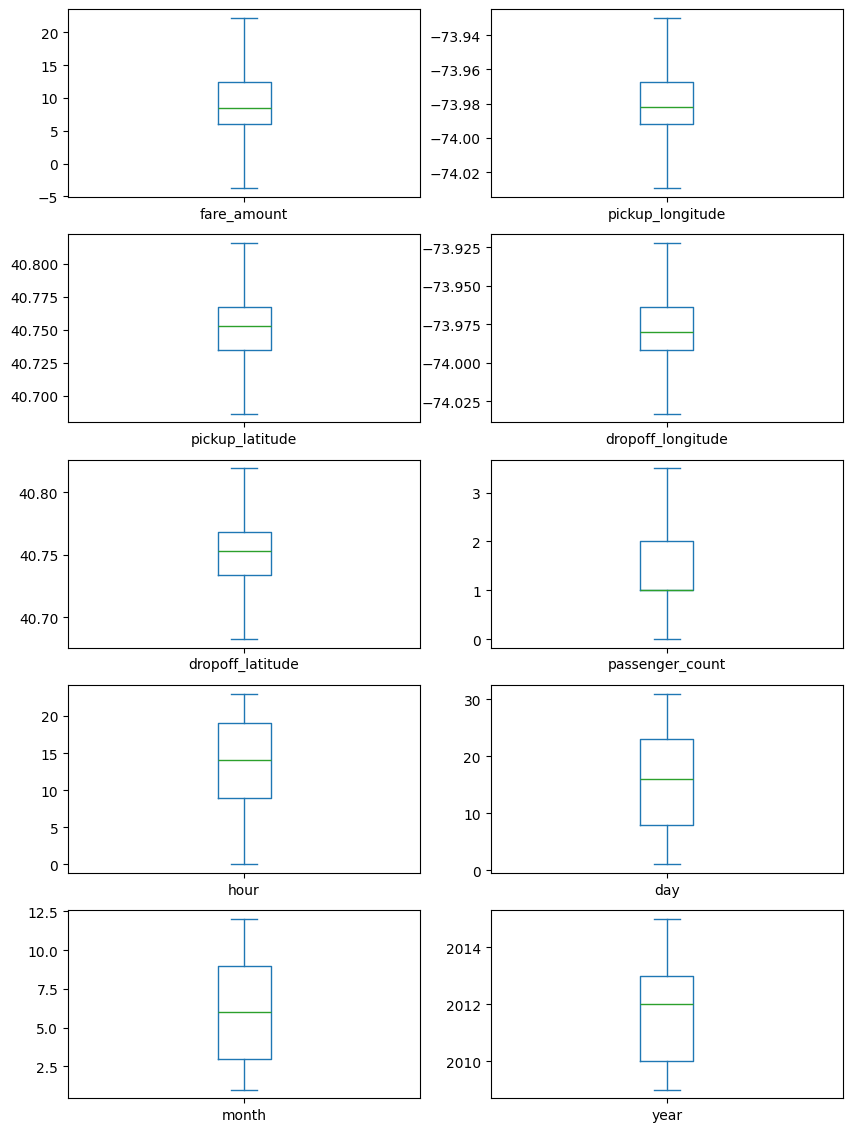

In [40]:
df = treat_all(df, df.iloc[:, 0::])
df.plot(kind = 'box', subplots = True, layout = (7,2), figsize=(10,20))

In [44]:
import haversine as hn
total_dist = []
for pos in range(len(df['pickup_longitude'])):
    lng1, lat1, lng2, lat2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    loc1 = (lat1, lng1)
    loc2 = (lat2, lng2)
    c = hn.haversine(loc1, loc2)
    total_dist.append(c)
df['total_dist'] = total_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,total_dist
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,4.116088


In [88]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
total_dist           0
dtype: int64

## Linear Regression Model

<Axes: >

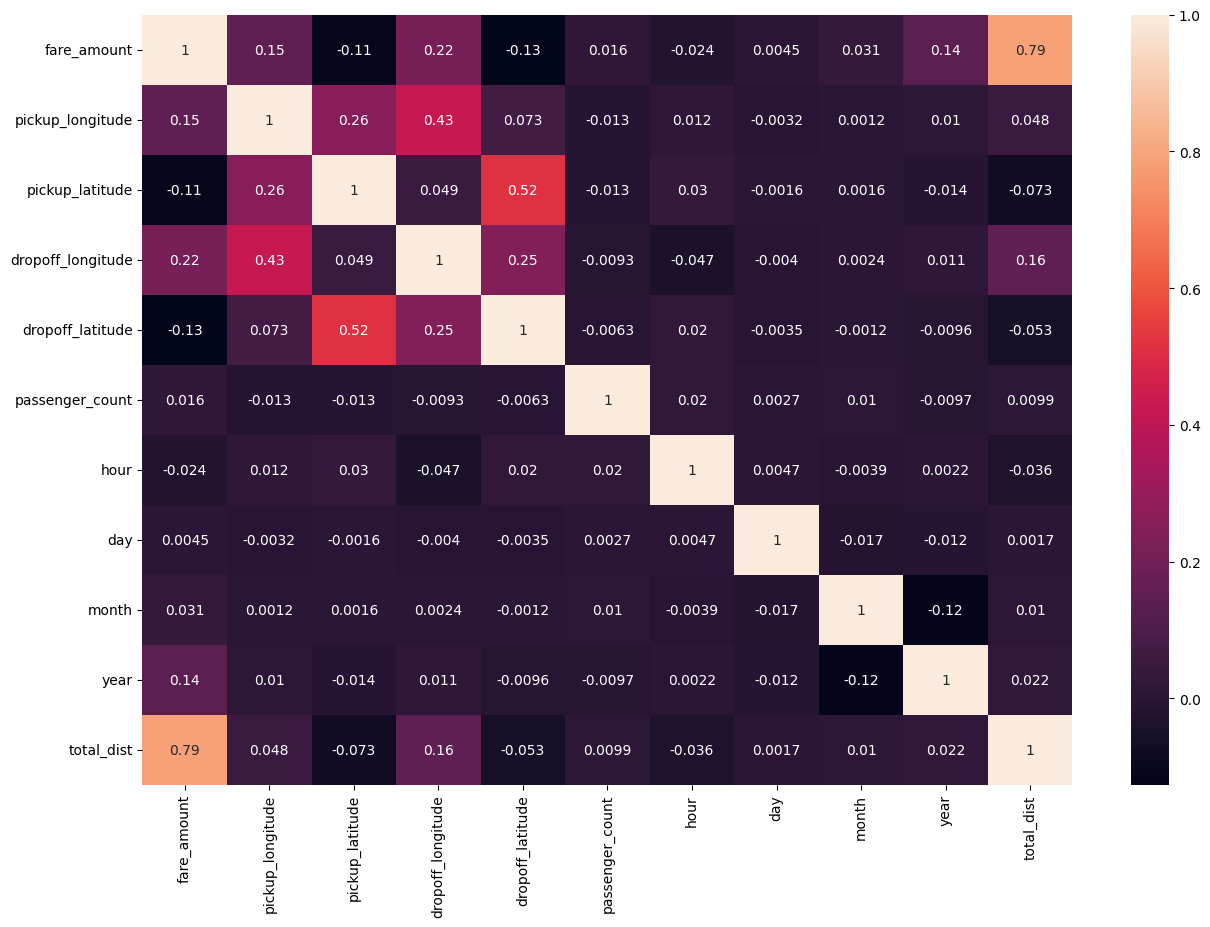

In [89]:
corr = df.corr()
fig = plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot = True )

### fare amount and total_dist are highly related

In [90]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','total_dist']]
y = df['fare_amount']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [94]:
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = lr.predict(X_test) #To predict the target values

In [96]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.65845566254583

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [98]:
y_pred = rf.predict(X_test)

In [99]:
y_pred

array([ 6.225 ,  4.897 ,  5.8565, ...,  6.3083, 12.4675,  4.077 ])

In [100]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7865597584845349